# Lab-2.1 Part 1: vLLM Setup and Installation

## Objectives
- Verify environment (CUDA, GPU)
- Install vLLM
- Run basic inference test
- Understand PagedAttention basics

## Estimated Time: 30-60 minutes

---
## 1. Environment Verification

In [2]:
# Check GPU availability
import torch
import sys

print(f"Python version: {sys.version}")
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")

if torch.cuda.is_available():
    print(f"CUDA version: {torch.version.cuda}")
    print(f"Number of GPUs: {torch.cuda.device_count()}")
    
    for i in range(torch.cuda.device_count()):
        print(f"\nGPU {i}: {torch.cuda.get_device_name(i)}")
        print(f"  Memory: {torch.cuda.get_device_properties(i).total_memory / 1e9:.2f} GB")
        print(f"  Compute Capability: {torch.cuda.get_device_properties(i).major}.{torch.cuda.get_device_properties(i).minor}")
else:
    print("\n⚠️ WARNING: No CUDA GPU detected!")
    print("vLLM requires a CUDA-compatible GPU to run efficiently.")


Python version: 3.10.12 (main, Aug 15 2025, 14:32:43) [GCC 11.4.0]
PyTorch version: 2.8.0+cu128
CUDA available: True
CUDA version: 12.8
Number of GPUs: 1

GPU 0: NVIDIA RTX 2000 Ada Generation
  Memory: 16.71 GB
  Compute Capability: 8.9


### Check GPU Memory

In [3]:
# Detailed GPU memory check
if torch.cuda.is_available():
    torch.cuda.empty_cache()
    
    for i in range(torch.cuda.device_count()):
        allocated = torch.cuda.memory_allocated(i) / 1e9
        reserved = torch.cuda.memory_reserved(i) / 1e9
        total = torch.cuda.get_device_properties(i).total_memory / 1e9
        
        print(f"GPU {i}:")
        print(f"  Allocated: {allocated:.2f} GB")
        print(f"  Reserved:  {reserved:.2f} GB")
        print(f"  Free:      {total - reserved:.2f} GB")
        print(f"  Total:     {total:.2f} GB")
        print()

GPU 0:
  Allocated: 0.00 GB
  Reserved:  0.00 GB
  Free:      16.71 GB
  Total:     16.71 GB



---
## 2. Install vLLM

vLLM can be installed via pip. For CUDA 12.1+:

In [4]:
# Check if vLLM is already installed
try:
    import vllm
    print(f"✅ vLLM is already installed: v{vllm.__version__}")
except ImportError:
    print("❌ vLLM is not installed.")
    print("\nTo fix this, please run the following commands in your terminal inside the poetry shell (`poetry shell`)")
    print("in the `00-Course_Setup` directory, and then restart the Jupyter kernel.")
    print("\n---")
    print('pip install "torch==2.3.0" "torchvision==0.18.0" "torchaudio==2.3.0" --index-url https://download.pytorch.org/whl/cu121')
    print('pip install "vllm==0.4.1"')
    print("---")


✅ vLLM is already installed: v0.11.0


### Installation Command

If vLLM is not installed, run in terminal:

```bash
# Basic installation
pip install vllm

# Or specify CUDA version
pip install vllm --extra-index-url https://download.pytorch.org/whl/cu121
```

---
## 3. Basic Inference Test

Let's test vLLM with a small model first.

In [5]:
# Import vLLM
from vllm import LLM, SamplingParams
import time

print("✅ vLLM imported successfully!")
print(f"Version: {vllm.__version__}")

INFO 10-23 18:37:09 [__init__.py:216] Automatically detected platform cuda.
✅ vLLM imported successfully!
Version: 0.11.0


### Load a Small Model

We'll use GPT-2 for quick testing (124M parameters).

In [8]:
# Initialize vLLM with GPT-2
print("Loading GPT-2 model...")
start_time = time.time()

llm = LLM(
    model="gpt2",
    # gpu_memory_utilization=0.3,  # Use 30% GPU memory for testing
    max_model_len=512,           # Limit context length
)

load_time = time.time() - start_time
print(f"✅ Model loaded in {load_time:.2f} seconds")

Loading GPT-2 model...
INFO 10-23 18:37:46 [utils.py:233] non-default args: {'max_model_len': 512, 'disable_log_stats': True, 'model': 'gpt2'}
INFO 10-23 18:37:47 [model.py:547] Resolved architecture: GPT2LMHeadModel
INFO 10-23 18:37:47 [model.py:1730] Downcasting torch.float32 to torch.bfloat16.
INFO 10-23 18:37:47 [model.py:1510] Using max model len 512
INFO 10-23 18:37:47 [scheduler.py:205] Chunked prefill is enabled with max_num_batched_tokens=8192.
INFO 10-23 18:37:51 [__init__.py:216] Automatically detected platform cuda.
(EngineCore_DP0 pid=498799) INFO 10-23 18:37:51 [core.py:644] Waiting for init message from front-end.
(EngineCore_DP0 pid=498799) INFO 10-23 18:37:51 [core.py:77] Initializing a V1 LLM engine (v0.11.0) with config: model='gpt2', speculative_config=None, tokenizer='gpt2', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.bfloat16, max_seq_len=512, download_dir=None, load_format=auto, tens

(EngineCore_DP0 pid=498799) Process EngineCore_DP0:
(EngineCore_DP0 pid=498799) Traceback (most recent call last):
(EngineCore_DP0 pid=498799)   File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
(EngineCore_DP0 pid=498799)     self.run()
(EngineCore_DP0 pid=498799)   File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run
(EngineCore_DP0 pid=498799)     self._target(*self._args, **self._kwargs)
(EngineCore_DP0 pid=498799)   File "/home/os-sunnie.gd.weng/.local/lib/python3.10/site-packages/vllm/v1/engine/core.py", line 712, in run_engine_core
(EngineCore_DP0 pid=498799)     raise e
(EngineCore_DP0 pid=498799)   File "/home/os-sunnie.gd.weng/.local/lib/python3.10/site-packages/vllm/v1/engine/core.py", line 699, in run_engine_core
(EngineCore_DP0 pid=498799)     engine_core = EngineCoreProc(*args, **kwargs)
(EngineCore_DP0 pid=498799)   File "/home/os-sunnie.gd.weng/.local/lib/python3.10/site-packages/vllm/v1/engine/core.py", line 498, in __ini

RuntimeError: Engine core initialization failed. See root cause above. Failed core proc(s): {}

### Generate Text

In [7]:
# Define sampling parameters
sampling_params = SamplingParams(
    temperature=0.8,
    top_p=0.95,
    max_tokens=50,
)

# Test prompts
prompts = [
    "Once upon a time in a distant land,",
    "The future of artificial intelligence is",
    "Python is a programming language that",
]

print("Generating text...\n")
start_time = time.time()

outputs = llm.generate(prompts, sampling_params)

generation_time = time.time() - start_time

# Display results
for i, output in enumerate(outputs):
    prompt = output.prompt
    generated_text = output.outputs[0].text
    print(f"Prompt {i+1}: {prompt}")
    print(f"Generated: {generated_text}")
    print("-" * 80)

print(f"\n⏱️  Total generation time: {generation_time:.2f} seconds")
print(f"⏱️  Average time per prompt: {generation_time/len(prompts):.2f} seconds")

Generating text...



NameError: name 'llm' is not defined

---
## 4. PagedAttention Overview

PagedAttention is vLLM's key innovation for efficient KV cache management.

### Traditional KV Cache Problem

Traditional approach allocates contiguous memory:

```
Request 1 (len=1024): ████████░░░░░░░░ (allocated 2048, used 1024)
Request 2 (len=512):  ████░░░░░░░░░░░░ (allocated 2048, used 512)

Memory waste: ~60%
```

### PagedAttention Solution

PagedAttention uses paging (like virtual memory):

```
Physical blocks: [P0][P1][P2][P3][P4][P5]...

Request 1: P0 → P1 → P2 → P3 (1024 tokens, 4 blocks)
Request 2: P4 → P5           (512 tokens, 2 blocks)

Memory waste: ~0%
```

findfont: Generic family 'sans-serif' not found because none of the following families were found: Noto Sans CJK TC\naxes.unicode_minus : False
findfont: Generic family 'sans-serif' not found because none of the following families were found: Noto Sans CJK TC\naxes.unicode_minus : False
findfont: Generic family 'sans-serif' not found because none of the following families were found: Noto Sans CJK TC\naxes.unicode_minus : False
findfont: Generic family 'sans-serif' not found because none of the following families were found: Noto Sans CJK TC\naxes.unicode_minus : False
findfont: Generic family 'sans-serif' not found because none of the following families were found: Noto Sans CJK TC\naxes.unicode_minus : False
findfont: Generic family 'sans-serif' not found because none of the following families were found: Noto Sans CJK TC\naxes.unicode_minus : False
findfont: Generic family 'sans-serif' not found because none of the following families were found: Noto Sans CJK TC\naxes.unicode_minus 

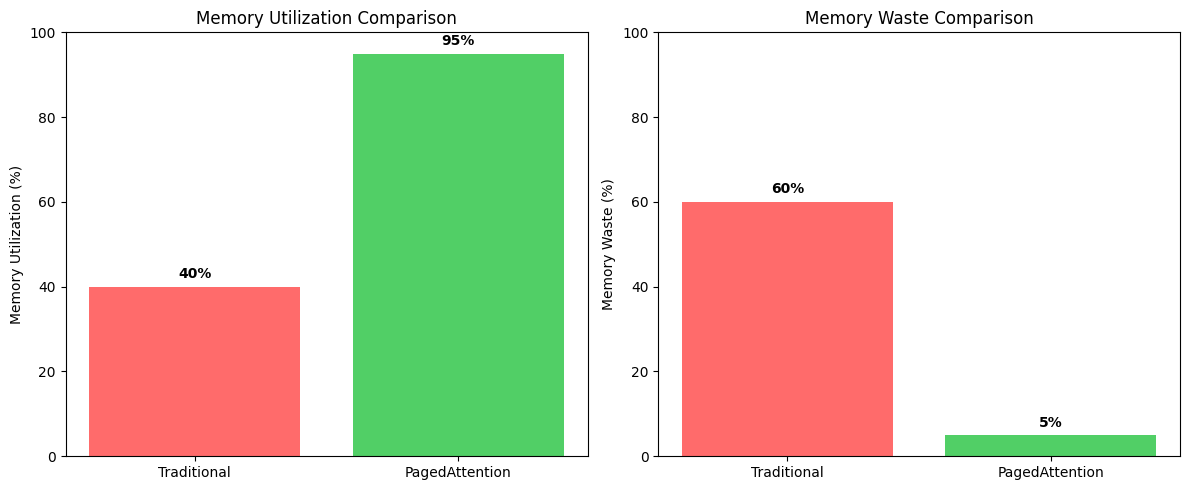


📊 PagedAttention improves memory utilization from 40% to 95%!


In [ ]:
# Visualize memory efficiency
import numpy as np
import matplotlib.pyplot as plt

# Simulated data
approaches = ['Traditional', 'PagedAttention']
memory_used = [40, 95]  # Percentage
memory_wasted = [60, 5]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Memory utilization
ax1.bar(approaches, memory_used, color=['#ff6b6b', '#51cf66'])
ax1.set_ylabel('Memory Utilization (%)')
ax1.set_title('Memory Utilization Comparison')
ax1.set_ylim(0, 100)
for i, v in enumerate(memory_used):
    ax1.text(i, v + 2, f"{v}%", ha='center', fontweight='bold')

# Memory waste
ax2.bar(approaches, memory_wasted, color=['#ff6b6b', '#51cf66'])
ax2.set_ylabel('Memory Waste (%)')
ax2.set_title('Memory Waste Comparison')
ax2.set_ylim(0, 100)
for i, v in enumerate(memory_wasted):
    ax2.text(i, v + 2, f"{v}%", ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n📊 PagedAttention improves memory utilization from 40% to 95%!")

---
## 5. Compare with HuggingFace

Let's compare vLLM with standard HuggingFace inference.

In [ ]:
# HuggingFace baseline
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch

print("Loading HuggingFace GPT-2...")
hf_model = AutoModelForCausalLM.from_pretrained("gpt2").to("cuda")
hf_tokenizer = AutoTokenizer.from_pretrained("gpt2")
hf_tokenizer.pad_token = hf_tokenizer.eos_token

print("✅ HuggingFace model loaded")

Loading HuggingFace GPT-2...
✅ HuggingFace model loaded


In [ ]:
# HuggingFace generation
test_prompt = "The future of artificial intelligence is"

print("Testing HuggingFace...")
inputs = hf_tokenizer(test_prompt, return_tensors="pt").to("cuda")

start_time = time.time()
with torch.no_grad():
    hf_outputs = hf_model.generate(
        **inputs,
        max_new_tokens=50,
        temperature=0.8,
        top_p=0.95,
        do_sample=True,
    )
hf_time = time.time() - start_time

hf_text = hf_tokenizer.decode(hf_outputs[0], skip_special_tokens=True)
print(f"HuggingFace output: {hf_text}")
print(f"Time: {hf_time:.3f}s")

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Testing HuggingFace...
HuggingFace output: The future of artificial intelligence is in its infancy. While artificial intelligence could eventually reach an advanced state of automation, that's not really a reason to invest much time in AI. The potential uses for AI in healthcare could be greatly expanded in the near future. AI could be a major
Time: 0.467s


In [ ]:
# vLLM generation (same prompt)
print("\nTesting vLLM...")
start_time = time.time()
vllm_outputs = llm.generate([test_prompt], sampling_params)
vllm_time = time.time() - start_time

vllm_text = vllm_outputs[0].outputs[0].text
print(f"vLLM output: {test_prompt}{vllm_text}")
print(f"Time: {vllm_time:.3f}s")


Testing vLLM...


Adding requests:   0%|          | 0/1 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/1 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

vLLM output: The future of artificial intelligence is now more complicated than ever.

The smartest people are smarter than the average person. They are smarter than the average person in some ways. But, for the average person, the human mind is a vast, vast machine. They are the best
Time: 0.117s


In [ ]:
# Performance comparison
speedup = hf_time / vllm_time

print("\n" + "="*80)
print("PERFORMANCE COMPARISON")
print("="*80)
print(f"HuggingFace:  {hf_time:.3f}s")
print(f"vLLM:         {vllm_time:.3f}s")
print(f"Speedup:      {speedup:.2f}x faster ⚡")
print("="*80)



PERFORMANCE COMPARISON
HuggingFace:  0.467s
vLLM:         0.117s
Speedup:      3.98x faster ⚡


---
## 6. Check vLLM Configuration

In [ ]:
# Inspect vLLM engine configuration
print("vLLM Engine Configuration:")
print(f"  Model: {llm.llm_engine.model_config.model}")
print(f"  Max model length: {llm.llm_engine.model_config.max_model_len}")
print(f"  GPU memory utilization: {llm.llm_engine.cache_config.gpu_memory_utilization}")
print(f"  Block size: {llm.llm_engine.cache_config.block_size}")


vLLM Engine Configuration:
  Model: gpt2
  Max model length: 512
  GPU memory utilization: 0.9
  Block size: 16


---
## Summary

✅ **Completed**:
1. Verified CUDA and GPU environment
2. Installed vLLM
3. Ran basic inference test
4. Understood PagedAttention benefits
5. Compared vLLM vs HuggingFace

📊 **Key Findings**:
- vLLM provides significant speedup over HuggingFace
- PagedAttention improves memory utilization from ~40% to ~95%
- Simple API similar to HuggingFace

➡️ **Next**: In `02-Basic_Inference.ipynb`, we'll explore:
- Batch inference
- Advanced sampling strategies
- Memory profiling
- Throughput optimization

---
## Exercises

1. **Try different models**: Replace GPT-2 with other models (e.g., `facebook/opt-125m`)
2. **Adjust parameters**: Experiment with `gpu_memory_utilization` and `max_model_len`
3. **Measure memory**: Use `nvidia-smi` to monitor GPU memory usage
4. **Batch size**: Test with different numbers of prompts (1, 4, 8, 16)

In [ ]:
# Clean up
import gc

del llm
del hf_model
torch.cuda.empty_cache()
gc.collect()

print("✅ Cleaned up GPU memory")

[rank0]:[W1021 21:20:53.293578239 ProcessGroupNCCL.cpp:1538] Warning: WARNING: destroy_process_group() was not called before program exit, which can leak resources. For more info, please see https://pytorch.org/docs/stable/distributed.html#shutdown (function operator())


✅ Cleaned up GPU memory
